## Mouse Spleen dataset

In [1]:
import sys
import os
import gc
import time
import pickle
import numpy as np
import pandas as pd

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from GpLSI.utils import *
from utils.data_helpers import *

ntumor = 0
tumors = ["BALBc-1", "BALBc-2", "BALBc-3"]
tumor = tumors[ntumor]

root_path = os.path.join(parent_dir, "data/spleen")
dataset_root = os.path.join(root_path, "dataset")
model_root = os.path.join(parent_dir, "output/spleen")

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### A. Align microenvironment topics

In [2]:
names = ["GpLSI", "pLSI", "TopicScore", "LDA", "SLDA"]
ntopics_list = [3, 5, 7, 10]
spatial_models = {}
for ntopic in ntopics_list:
    model_path = os.path.join(model_root, f'{tumor}_spleen_model_results_{ntopic}_.pkl')
    with open(model_path, 'rb') as f:
        results = pickle.load(f)
    spatial_models[ntopic] = [results[1]]

models = apply_order(spatial_models, ntopics_list)
coord_df = spatial_models[3][0]['coord_df']

# Get non-b-cells coordinates
coords_path = os.path.join(dataset_root, 'spleen_dfs.pkl')
data = pd.read_pickle(coords_path)

cell_coords = data[tumor]
non_b_coords = cell_coords[~cell_coords.isb]

non_b_coords[["x", "y"]] = normaliza_coords(non_b_coords[["x", "y"]])

/Users/jeong-yeojin/Dropbox/내 Mac (정여진의 MacBook Pro)/Desktop/GpLSI/utils/data_helpers.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords["x"] = (coords["x"] - minX) / diaglen
/Users/jeong-yeojin/Dropbox/내 Mac (정여진의 MacBook Pro)/Desktop/GpLSI/utils/data_helpers.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords["y"] = (coords["y"] - minY) / diaglen
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/1111172860.py:20: SettingWithCopyWarning: 
A value is trying to b

### B. Plot microenvironment topics for all methods

/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/301105370.py:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=6, edgecolor='none', legend=False)
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/301105370.py:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=6, edgecolor='none', legend=False)
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/301105370.py:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=6, edgecolor='none', legend=False)
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/301105370.py:2

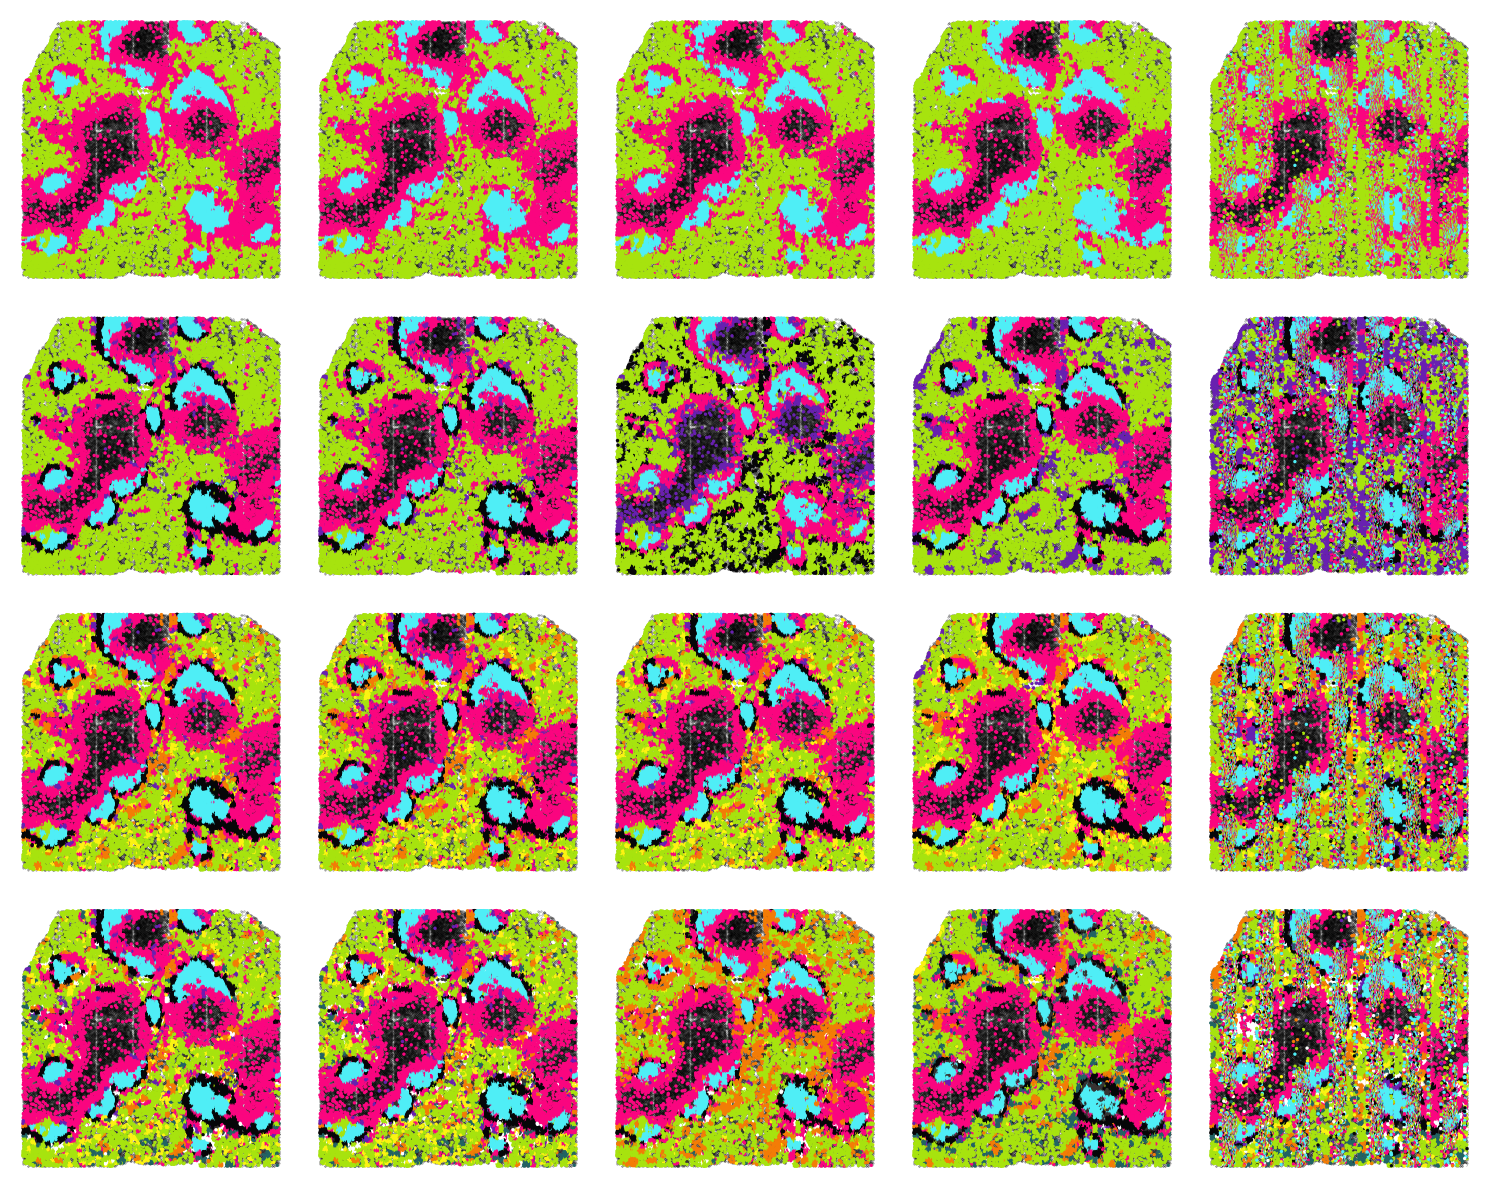

In [3]:
ntopics = [3, 5, 7, 10]

distinct_colors = [
    '#A7E30E', '#FA057F', '#4FEEF6', '#6820B0', '#060608', '#FBF312', '#F37C06', '#363332', '#226363', '#FFFFFF'
]

fig, axes = plt.subplots(4, 5, figsize=(15, 12))

for i, ntopic in enumerate(ntopics):
    Whats = [W for W in models[ntopic][0]['Whats']]
    morans = models[ntopic][0]['morans']
    pas = [j for j in models[ntopic][0]['pas']]
    
    for j in range(5):
        ax = axes[i, j]
        ax.scatter(
        -non_b_coords["x"],
        non_b_coords["y"],
        s=1,
        c="k",
        marker="x",
        label="Non-B",
        alpha=0.2,
    )
        w = np.argmax(Whats[j], axis=1)
        samp_coord_ = coord_df.copy()
        samp_coord_['x'] = - samp_coord_['x']
        samp_coord_['tpc'] = w
        sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=6, edgecolor='none', legend=False)
        name = names[j]
        #ax.set_title(f'{name} (chaos:{np.round(pas[j], 5)}, moran:{np.round(morans[j], 3)})')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

### C. Zoom-in tissue (GpLSI, pLSI, LDA)

/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/3115497442.py:24: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=15, edgecolor='none', legend=False)
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/3115497442.py:24: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=15, edgecolor='none', legend=False)
/var/folders/0b/w1czghy14lgbrx9zm77dkkvw0000gn/T/ipykernel_59531/3115497442.py:24: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=15, edgecolor='none', legend=False)


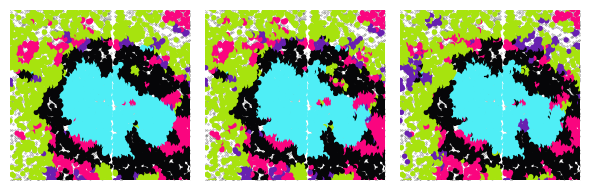

In [4]:
ntopic = 5

fig, axes = plt.subplots(1, 3, figsize=(6, 2))

Whats = [models[ntopic][0]['Whats'][0], models[ntopic][0]['Whats'][1], models[ntopic][0]['Whats'][3]]
morans = [models[ntopic][0]['morans'][0], models[ntopic][0]['morans'][1], models[ntopic][0]['morans'][3]]
pas = [models[ntopic][0]['pas'][0], models[ntopic][0]['pas'][1], models[ntopic][0]['pas'][3]]

for j in range(3):
    ax = axes[j]
    ax.scatter(
        -non_b_coords["x"],
        non_b_coords["y"],
        s=1,
        c="k",
        marker="x",
        label="Non-B",
        alpha=0.2,
    )
    w = np.argmax(Whats[j], axis=1)
    samp_coord_ = coord_df.copy()
    samp_coord_['x'] = -samp_coord_['x']
    samp_coord_['tpc'] = w
    sns.scatterplot(x='x', y='y', hue='tpc', data=samp_coord_, palette=distinct_colors, ax=ax, s=15, edgecolor='none', legend=False)
    name = names[j]
    # ax.set_title(f'{name} (chaos:{np.round(pas[j], 5)}, moran:{np.round(morans[j], 3)})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Set x and y axis limits
    ax.set_xlim(-0.31, -0.13)
    ax.set_ylim(0.10, 0.28)

plt.tight_layout()
plt.show()